# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement


**The aim of this project is to identify the prominent factors that affect sale prices in Ames, Iowa.**

### Contents:
- [Data preparation](#Data-preparation-for-model)
- [Applying Linear Regression with variables in priority list](#Applying-linear-regression-models-on-training-set)
- [Investigate variables in wait list](#Adding-variables-in-wait-list)
- [Ridge and Lasso Regression](#Ridge-lasso-regression)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)


## Background

In this project, data from the well known Ames housing data would be used to create regression models that will predict the sale price of houses in the area. 
<br>
<br> The Ames Housing dataset described the sale of individual residential property in Ames, Iowa from 2006 to 2010. It was found by Dr Dean De Cock, Professor of Statistics at Truman State University for his students to utilise the skills he taught in class ([source](http://jse.amstat.org/v19n3/decock.pdf)). The data set contains almost 2050 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing property values. These 79-80 or so variables describe (almost) every physical attributes (quality and quantity) of the properties. Most of the variables described are features that a potential buyer would want to know before an offer was made.  


### Data

**Data from kaggle:** ([source](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/rules))
* train_set.csv: this dataset contains variables (in priority list) after cleaning and EDA performed. Data will be fed into the regression model to make predictions.
* waitlist.csv: this dataset contains the secondary variables that may be also of interest

*General description of the variables are provided in data documentation* ([source](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)).

*Libraries were added here*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error


## Data Import 

In [2]:
trainlist = pd.read_csv('../datasets/train_set.csv', keep_default_na = False)
waitlist = pd.read_csv('../datasets/waitlist.csv', keep_default_na = False)


In [3]:
# preview of the data
trainlist.head()

,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,...,fireplace_qu,garage_age,garage_finish,garage_cars,house_style,exterior_1st,mas_vnr_type,foundation,garage_type,saleprice
0,6,5,4,3,725.0,5,725,1479,2.5,4,...,0,34.0,2,2.0,2Story,HdBoard,BrkFace,CBlock,Attchd,130500
1,7,12,4,4,913.0,5,913,2122,3.5,4,...,3,12.0,2,2.0,2Story,VinylSd,BrkFace,PConc,Attchd,220000
2,5,3,3,3,1057.0,3,1057,1057,2.0,4,...,0,57.0,1,1.0,1Story,VinylSd,None,CBlock,Detchd,109000
3,5,3,3,4,384.0,4,744,1444,2.5,3,...,0,3.0,3,2.0,2Story,VinylSd,None,PConc,BuiltIn,174000
4,6,17,3,2,676.0,3,831,1445,2.0,3,...,0,53.0,1,2.0,1.5Fin,Wd Sdng,None,PConc,Detchd,138500


In [4]:
trainlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   overall_qual   1912 non-null   int64  
 1   age            1912 non-null   int64  
 2   exter_qual     1912 non-null   int64  
 3   bsmt_qual      1912 non-null   int64  
 4   total_bsmt_sf  1912 non-null   float64
 5   heating_qc     1912 non-null   int64  
 6   1st_flr_sf     1912 non-null   int64  
 7   gr_liv_area    1912 non-null   int64  
 8   total_bath     1912 non-null   float64
 9   kitchen_qual   1912 non-null   int64  
 10  totrms_abvgrd  1912 non-null   int64  
 11  fireplace_qu   1912 non-null   int64  
 12  garage_age     1912 non-null   float64
 13  garage_finish  1912 non-null   int64  
 14  garage_cars    1912 non-null   float64
 15  house_style    1912 non-null   object 
 16  exterior_1st   1912 non-null   object 
 17  mas_vnr_type   1912 non-null   object 
 18  foundati

From ' .info', there are 20 variables and the target variable 'saleprice'.

In [5]:
trainlist.isnull().sum()

overall_qual     0
age              0
exter_qual       0
bsmt_qual        0
total_bsmt_sf    0
heating_qc       0
1st_flr_sf       0
gr_liv_area      0
total_bath       0
kitchen_qual     0
totrms_abvgrd    0
fireplace_qu     0
garage_age       0
garage_finish    0
garage_cars      0
house_style      0
exterior_1st     0
mas_vnr_type     0
foundation       0
garage_type      0
saleprice        0
dtype: int64

This is just to ensure that there are no missing data.

### Data preparation for model

In [6]:
X = trainlist.drop(columns=['saleprice'],axis=1)
y = trainlist['saleprice']

In [7]:
X.head()

,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_age,garage_finish,garage_cars,house_style,exterior_1st,mas_vnr_type,foundation,garage_type
0,6,5,4,3,725.0,5,725,1479,2.5,4,6,0,34.0,2,2.0,2Story,HdBoard,BrkFace,CBlock,Attchd
1,7,12,4,4,913.0,5,913,2122,3.5,4,8,3,12.0,2,2.0,2Story,VinylSd,BrkFace,PConc,Attchd
2,5,3,3,3,1057.0,3,1057,1057,2.0,4,5,0,57.0,1,1.0,1Story,VinylSd,None,CBlock,Detchd
3,5,3,3,4,384.0,4,744,1444,2.5,3,7,0,3.0,3,2.0,2Story,VinylSd,None,PConc,BuiltIn
4,6,17,3,2,676.0,3,831,1445,2.0,3,6,0,53.0,1,2.0,1.5Fin,Wd Sdng,None,PConc,Detchd


---

#### Generating the polynomial features 

Any of these variables could be related to each other, or have an interactive effect with each other. Any synergistic effect on sale price could add significant predictive power to the model. 

Since nominal variables requires dummy variables (0,1), one does not get more information from increasing the interactive effects of these variables. So once again, a dataframe only of numerical data are created, and PolynomialFeatures will be performed only on the numerical variables. 

In [8]:
# select columns with numerical variables
numerical = X.select_dtypes(include=['int64','float64']).copy()
numerical.head()

,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_age,garage_finish,garage_cars
0,6,5,4,3,725.0,5,725,1479,2.5,4,6,0,34.0,2,2.0
1,7,12,4,4,913.0,5,913,2122,3.5,4,8,3,12.0,2,2.0
2,5,3,3,3,1057.0,3,1057,1057,2.0,4,5,0,57.0,1,1.0
3,5,3,3,4,384.0,4,744,1444,2.5,3,7,0,3.0,3,2.0
4,6,17,3,2,676.0,3,831,1445,2.0,3,6,0,53.0,1,2.0


In [9]:
# Generating the polynomial features table.  
# instantiate
poly = PolynomialFeatures(include_bias=False)

# fit and transform the variables in the numerical dataframe
X_poly = poly.fit_transform(numerical)
X_poly.shape

(1912, 135)

In [10]:
# Checking column names to all polynomial features
X_poly = pd.DataFrame(X_poly,columns=poly.get_feature_names(numerical.columns))

# Generating list of poly feature correlations
X_poly_corrs = X_poly.corrwith(y)

# Shows top 20 features most positively correlated with sale price
X_poly_corrs.sort_values(ascending=False).head(30)

overall_qual gr_liv_area      0.873791
exter_qual gr_liv_area        0.856729
gr_liv_area kitchen_qual      0.847954
bsmt_qual gr_liv_area         0.845590
overall_qual 1st_flr_sf       0.837385
overall_qual kitchen_qual     0.832957
total_bsmt_sf gr_liv_area     0.828958
overall_qual exter_qual       0.828731
overall_qual total_bsmt_sf    0.826074
overall_qual^2                0.825807
overall_qual garage_cars      0.824801
overall_qual total_bath       0.815423
overall_qual bsmt_qual        0.813095
overall_qual totrms_abvgrd    0.812736
gr_liv_area garage_cars       0.802254
exter_qual 1st_flr_sf         0.800260
overall_qual                  0.799054
1st_flr_sf kitchen_qual       0.798094
bsmt_qual 1st_flr_sf          0.797438
total_bsmt_sf kitchen_qual    0.795575
total_bsmt_sf total_bath      0.793628
bsmt_qual total_bsmt_sf       0.790733
exter_qual total_bsmt_sf      0.790327
1st_flr_sf total_bath         0.789624
1st_flr_sf gr_liv_area        0.789479
kitchen_qual garage_cars 

In [11]:
# Shows features most negatively correlated with sale price
X_poly_corrs.sort_values().head(10)

age                       -0.545236
garage_age                -0.540672
age exter_qual            -0.518116
age kitchen_qual          -0.505837
age^2                     -0.503552
exter_qual garage_age     -0.502936
age garage_age            -0.486993
age heating_qc            -0.478833
kitchen_qual garage_age   -0.477271
age bsmt_qual             -0.465459
dtype: float64

There are two main dominant features 'overall_qual' and 'gr_liv_area'. The next features of interest are 'exter_qual' 'bsmt_qual' and 'kitchen_qual'. The re-calculation of 'total_bath' was found to also have high correlation. So from previous cleaning/EDA, spearman rank correlation and polynomic correlation, the focus will be on these features.
<br>
<br> The interaction between 'overall_qual' and 'gr_liv_area' will be selected. The next highest polynomic correlation not having these two features will be the interactive terms between 'exter_qual' and '1st_flr_sf', and between 'total_bsmt_sf' and 'kitchen_qual'

It would also be good to know the most negatively correlated features with sale price. This would help in the analysis later during modeling as well. It is evident here that age of the property/garage will negatively impact the sale price (ie., the older the property, the lower the sale price).

In [12]:
# These are the four polynomial features added.
# Square of 'overall_qual'
X['overall_qual*overall_qual'] = X['overall_qual'] * X['overall_qual']

# Interaction between 'overall_qual' and 'gr_liv_area'
X['overall_qual*gr_liv_area'] = X['overall_qual'] * X['gr_liv_area']

# Interaction between 'exter_qual ' and '1st_flr_sf'
X['exter_qual*1st_flr_sf'] = X['exter_qual'] * X['1st_flr_sf']

# Interaction between 'total_bsmt_sf' and 'kitchen_qual'
X['total_bsmt_sf*kitchen_qual'] = X['total_bsmt_sf'] * X['kitchen_qual']

In [13]:
#We now have 20+4 features in total from the priority list
X.shape

(1912, 24)

In [14]:
def plot_scatterplot(df):
    '''this function plots scatterplots using the variables (as columns) in dataframe df'''
    # determining columns
    ncols = 2
    cols = df.columns

    # determining number of rows
    nrows = int(np.ceil(len(df.columns) / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=(15,15))
    axes = axes.ravel()

    for col, ax in zip(cols, axes):
        sns.scatterplot(y = trainlist.saleprice, 
                    x = df[col], 
                    hue=trainlist.overall_qual, 
                    palette= 'YlOrRd',
                    ax=ax);

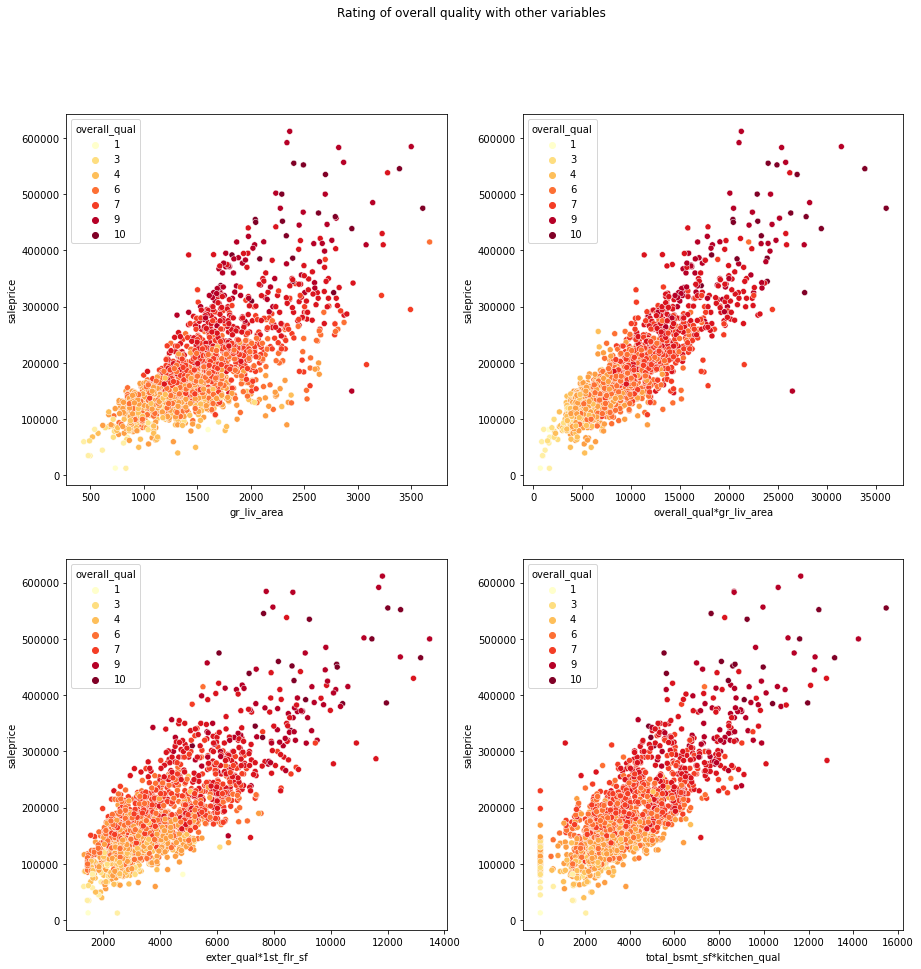

In [15]:
int_columns = X[['gr_liv_area','overall_qual*gr_liv_area','exter_qual*1st_flr_sf','total_bsmt_sf*kitchen_qual']]
plot_scatterplot(int_columns)
plt.suptitle('Rating of overall quality with other variables');

The above plots showed that the interaction terms demonstrated a positive correlation with sale price. Since interaction terms will also multiply outliers, (luckily) the plots did not show too drastic outliers. The two outliers in gr_liv_area >4000 sq feet were already removed. 
<br>
<br> These plots also showed that overall quality does possess the higest correlation with saleprice. Overall quality will take the overall condition, material, aesthetics of the property. So the high positive correlation with saleprice is evident here. 

---

#### Splitting the data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Dealing with training data (X_train, y_train)

#### One-hot encoding the nominal variables


In [17]:
# select columns with nominal variables
nominal_20 = X_train.select_dtypes(include=['object']).copy()

Before making dummy columns, one need to check that all types are represented. This is because the training and/or test sets might have missing categories in each nominal variable. One can do this by referring to the data documentary.


In [18]:
# examining the number of types in each nominal variables
for col in nominal_20.columns:
    print(col, ':', len(nominal_20[col].unique()))


house_style : 8
exterior_1st : 13
mas_vnr_type : 4
foundation : 6
garage_type : 6


There is an assumption of linearity in linear regression (ie., linear combination of coefficients and variables). Thus, one MUST drop one column (during get_dummies or one-hot encoding) because by creating a baseline, the other remaining columns are linearly independent with each other. This especially applies to linear regression.
<br> 
<br> For polynomial regression, this is not so, as an arbitrary polynomial function is used for fitting the target variable. But also because of this 'freedom', regularization must be used to 'regulate' the fitting process, so overfitting does not occur.  


In [19]:
dummy_20 = pd.get_dummies(data=nominal_20, columns=nominal_20.columns, drop_first=True)
pd.set_option('display.max_columns',50)
dummy_20.reset_index(inplace=True)
dummy_20

,index,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd
0,1378,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,1662,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1786,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1395,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,1130,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1525,1294,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1526,860,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1527,1459,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


##### Scaling the numerical data

The aim of PolynomialFeatures is to increase the predictive power of some variables. So standardizing/scaling should be done after PolynomialFeatures, so that there is no loss of signal/power. In addition, scaling will create a set of positive and negative values. Performing PolynomialFeatures after scaling, will increase the negative (scaled) values.

In [20]:
# once again, select columns with numerical variables
numerical_20 = X_train.select_dtypes(include=['int64','float64']).copy() 

# 15+3 numerical variables
numerical_20.head()

,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_age,garage_finish,garage_cars,overall_qual*overall_qual,overall_qual*gr_liv_area,exter_qual*1st_flr_sf,total_bsmt_sf*kitchen_qual
1378,6,10,3,4,1838.0,5,1838,1838,4.0,3,8,0,10.0,1,3.0,36,11028,5514,5514.0
1662,5,14,3,4,1392.0,3,1392,1392,2.5,3,5,4,53.0,1,2.0,25,6960,4176,4176.0
1786,5,57,3,2,910.0,3,910,1435,2.0,3,6,0,57.0,1,1.0,25,7175,2730,2730.0
339,5,9,3,3,793.0,5,848,1520,1.0,3,6,0,41.0,1,1.0,25,7600,2544,2379.0
1395,5,10,3,4,520.0,5,1464,1464,2.5,3,6,3,12.0,2,2.0,25,7320,4392,1560.0


In [21]:
# instantiate sc_20
sc_20 = StandardScaler()

# scaling only training data
X_scaled_20 = pd.DataFrame(sc_20.fit_transform(numerical_20))
X_scaled_20.columns = numerical_20.columns
X_scaled_20.reset_index(inplace=True)
X_scaled_20

,index,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_age,garage_finish,garage_cars,overall_qual*overall_qual,overall_qual*gr_liv_area,exter_qual*1st_flr_sf,total_bsmt_sf*kitchen_qual
0,0,-0.117931,-0.627384,-0.730998,0.556992,1.816197,0.855464,1.791433,0.693628,2.223176,-0.831422,1.045584,-1.022790,-0.779957,-0.99314,1.723948,-0.221628,0.287923,0.783456,0.788447
1,1,-0.839196,-0.434943,-0.730998,0.556992,0.765449,-1.245748,0.593291,-0.235023,0.326634,-0.831422,-0.955290,1.191505,0.958814,-0.99314,0.198533,-0.844966,-0.567193,0.042722,0.133888
2,2,-0.839196,1.633796,-0.730998,-1.708010,-0.370113,-1.245748,-0.701563,-0.145490,-0.305547,-0.831422,-0.288332,-1.022790,1.120560,-0.99314,-1.326882,-0.844966,-0.521999,-0.757802,-0.573506
3,3,-0.839196,-0.675494,-0.730998,-0.575509,-0.645758,0.855464,-0.868121,0.031495,-1.569908,-0.831422,-0.288332,-1.022790,0.473575,-0.99314,-1.326882,-0.844966,-0.432662,-0.860774,-0.745218
4,4,-0.839196,-0.627384,-0.730998,0.556992,-1.288929,0.855464,0.786713,-0.085106,0.326634,-0.831422,-0.288332,0.637931,-0.699084,0.22851,0.198533,-0.844966,-0.491519,0.162303,-1.145879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,1524,1.324599,-1.060375,0.991183,0.556992,0.944500,0.855464,0.797458,-0.076778,-0.305547,0.698355,-0.288332,1.191505,-1.143886,0.22851,1.723948,1.365051,0.438430,0.981649,0.963584
1525,1525,-0.117931,-0.579273,-0.730998,0.556992,-0.327707,0.855464,-0.653207,0.556204,1.590995,-0.831422,0.378626,0.637931,-0.739520,0.22851,0.198533,-0.221628,0.204682,-0.727907,-0.547089
1526,1526,-0.839196,1.730017,-0.730998,-0.575509,0.011549,-1.245748,-0.266363,-0.901319,-0.305547,-0.831422,-0.955290,-1.022790,-0.092536,-0.99314,4.774778,-0.844966,-0.903522,-0.488746,-0.335751
1527,1527,-0.839196,-0.819824,0.991183,0.556992,-0.096825,0.855464,-0.389938,-0.997100,0.326634,-0.831422,-0.955290,-1.022790,0.150083,-0.99314,-1.326882,-0.844966,-0.951870,0.002862,-0.403262


##### Recombine both nominal and numerical dataframe

In [22]:
# concating both dataframes
X_20_train = pd.concat([X_scaled_20,dummy_20], axis=1)
X_20_train.drop(columns=['index'],inplace=True)
X_20_train.head()

,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_age,garage_finish,garage_cars,overall_qual*overall_qual,overall_qual*gr_liv_area,exter_qual*1st_flr_sf,total_bsmt_sf*kitchen_qual,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,...,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd
0,-0.117931,-0.627384,-0.730998,0.556992,1.816197,0.855464,1.791433,0.693628,2.223176,-0.831422,1.045584,-1.022790,-0.779957,-0.99314,1.723948,-0.221628,0.287923,0.783456,0.788447,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,-0.839196,-0.434943,-0.730998,0.556992,0.765449,-1.245748,0.593291,-0.235023,0.326634,-0.831422,-0.955290,1.191505,0.958814,-0.99314,0.198533,-0.844966,-0.567193,0.042722,0.133888,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,-0.839196,1.633796,-0.730998,-1.708010,-0.370113,-1.245748,-0.701563,-0.145490,-0.305547,-0.831422,-0.288332,-1.022790,1.120560,-0.99314,-1.326882,-0.844966,-0.521999,-0.757802,-0.573506,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
3,-0.839196,-0.675494,-0.730998,-0.575509,-0.645758,0.855464,-0.868121,0.031495,-1.569908,-0.831422,-0.288332,-1.022790,0.473575,-0.99314,-1.326882,-0.844966,-0.432662,-0.860774,-0.745218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,-0.839196,-0.627384,-0.730998,0.556992,-1.288929,0.855464,0.786713,-0.085106,0.326634,-0.831422,-0.288332,0.637931,-0.699084,0.22851,0.198533,-0.844966,-0.491519,0.162303,-1.145879,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [23]:
X_20_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   overall_qual                1529 non-null   float64
 1   age                         1529 non-null   float64
 2   exter_qual                  1529 non-null   float64
 3   bsmt_qual                   1529 non-null   float64
 4   total_bsmt_sf               1529 non-null   float64
 5   heating_qc                  1529 non-null   float64
 6   1st_flr_sf                  1529 non-null   float64
 7   gr_liv_area                 1529 non-null   float64
 8   total_bath                  1529 non-null   float64
 9   kitchen_qual                1529 non-null   float64
 10  totrms_abvgrd               1529 non-null   float64
 11  fireplace_qu                1529 non-null   float64
 12  garage_age                  1529 non-null   float64
 13  garage_finish               1529 

---

### Dealing with validation set (X_test, y_test)


#### One-hot encoding the nominal variables


In [24]:
# select columns with nominal variables
nominal_20t = X_test.select_dtypes(include=['object']).copy()

dummy_20t = pd.get_dummies(data=nominal_20t, columns=nominal_20t.columns, drop_first=True)
pd.set_option('display.max_columns',50)
dummy_20t.reset_index(inplace=True)
dummy_20t

,index,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd
0,1229,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,111,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
2,1845,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1326,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
4,415,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,1840,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
379,733,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
380,584,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
381,812,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0


#### Checking for same number of columns in both dummy (train and test) sets

In [25]:
# Get missing columns in the training test
missing_cols = set(dummy_20.columns) - set(dummy_20t.columns)

# Add a missing column in test set with default value equal to 0
for col in missing_cols:
    dummy_20t[col] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
dummy_20t = dummy_20t[dummy_20.columns]

In [26]:
dummy_20t

,index,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd
0,1229,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,111,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1845,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1326,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
4,415,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,1840,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
379,733,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
380,584,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
381,812,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


##### Scaling the numerical data


In [27]:
# once again, select columns with numerical variables
numerical_20t = X_test.select_dtypes(include=['int64','float64']).copy() 

# 15+4 numerical variables
numerical_20t.head()

,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_age,garage_finish,garage_cars,overall_qual*overall_qual,overall_qual*gr_liv_area,exter_qual*1st_flr_sf,total_bsmt_sf*kitchen_qual
1229,6,12,3,4,773.0,4,773,1658,3.5,3,8,3,13.0,3,2.0,36,9948,2319,2319.0
111,5,46,3,3,988.0,3,988,988,2.0,3,5,0,44.0,1,2.0,25,4940,2964,2964.0
1845,7,16,3,4,728.0,3,1136,2019,1.0,4,8,0,12.0,1,2.0,49,14133,3408,2912.0
1326,5,57,3,2,876.0,3,876,876,1.0,3,5,3,36.0,1,2.0,25,4380,2628,2628.0
415,6,39,3,3,1442.0,3,1442,1442,2.0,3,6,3,39.0,2,2.0,36,8652,4326,4326.0


In [28]:
# transforming only test data using sc_20
X_scaled_20t = pd.DataFrame(sc_20.transform(numerical_20t))
X_scaled_20t.columns = numerical_20t.columns
X_scaled_20t.reset_index(inplace=True)
X_scaled_20t.head()

,index,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_age,garage_finish,garage_cars,overall_qual*overall_qual,overall_qual*gr_liv_area,exter_qual*1st_flr_sf,total_bsmt_sf*kitchen_qual
0,0,-0.117931,-0.531163,-0.730998,0.556992,-0.692877,-0.195142,-1.069602,0.318836,1.590995,-0.831422,1.045584,0.637931,-0.658647,1.450161,0.198533,-0.221628,0.060901,-0.985336,-0.774571
1,1,-0.839196,1.104584,-0.730998,-0.575509,-0.186350,-1.245748,-0.492022,-1.076222,-0.305547,-0.831422,-0.955290,-1.022790,0.594885,-0.993140,0.198533,-0.844966,-0.991809,-0.628256,-0.459032
2,2,0.603334,-0.338722,-0.730998,0.556992,-0.798894,-1.245748,-0.094432,1.070501,-1.569908,0.698355,1.045584,-1.022790,-0.699084,-0.993140,0.198533,0.515044,0.940611,-0.382452,-0.484471
3,3,-0.839196,1.633796,-0.730998,-1.708010,-0.450215,-1.245748,-0.792901,-1.309426,-1.569908,-0.831422,-0.955290,0.637931,0.271393,-0.993140,0.198533,-0.844966,-1.109524,-0.814270,-0.623405
4,4,-0.117931,0.767813,-0.730998,-0.575509,0.883246,-1.245748,0.727612,-0.130914,-0.305547,-0.831422,-0.288332,0.637931,0.392702,0.228510,0.198533,-0.221628,-0.211526,0.125764,0.207269


##### Recombine both nominal and numerical dataframe


In [29]:
# concating both dataframes
X_20_test = pd.concat([X_scaled_20t,dummy_20t], axis=1)
X_20_test.drop(columns=['index'],inplace=True)
X_20_test.head()


,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_age,garage_finish,garage_cars,overall_qual*overall_qual,overall_qual*gr_liv_area,exter_qual*1st_flr_sf,total_bsmt_sf*kitchen_qual,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,...,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd
0,-0.117931,-0.531163,-0.730998,0.556992,-0.692877,-0.195142,-1.069602,0.318836,1.590995,-0.831422,1.045584,0.637931,-0.658647,1.450161,0.198533,-0.221628,0.060901,-0.985336,-0.774571,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,-0.839196,1.104584,-0.730998,-0.575509,-0.186350,-1.245748,-0.492022,-1.076222,-0.305547,-0.831422,-0.955290,-1.022790,0.594885,-0.993140,0.198533,-0.844966,-0.991809,-0.628256,-0.459032,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0.603334,-0.338722,-0.730998,0.556992,-0.798894,-1.245748,-0.094432,1.070501,-1.569908,0.698355,1.045584,-1.022790,-0.699084,-0.993140,0.198533,0.515044,0.940611,-0.382452,-0.484471,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,-0.839196,1.633796,-0.730998,-1.708010,-0.450215,-1.245748,-0.792901,-1.309426,-1.569908,-0.831422,-0.955290,0.637931,0.271393,-0.993140,0.198533,-0.844966,-1.109524,-0.814270,-0.623405,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
4,-0.117931,0.767813,-0.730998,-0.575509,0.883246,-1.245748,0.727612,-0.130914,-0.305547,-0.831422,-0.288332,0.637931,0.392702,0.228510,0.198533,-0.221628,-0.211526,0.125764,0.207269,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [30]:
X_20_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   overall_qual                383 non-null    float64
 1   age                         383 non-null    float64
 2   exter_qual                  383 non-null    float64
 3   bsmt_qual                   383 non-null    float64
 4   total_bsmt_sf               383 non-null    float64
 5   heating_qc                  383 non-null    float64
 6   1st_flr_sf                  383 non-null    float64
 7   gr_liv_area                 383 non-null    float64
 8   total_bath                  383 non-null    float64
 9   kitchen_qual                383 non-null    float64
 10  totrms_abvgrd               383 non-null    float64
 11  fireplace_qu                383 non-null    float64
 12  garage_age                  383 non-null    float64
 13  garage_finish               383 non

---

### Applying linear regression models on training set

##### Linear Regression

**Simplest model**
<br>
<br> Let's just start with modeling a really small number of variables/features. Since 'overall_qual' and 'gr_liv_area' have the largest correlation with 'saleprice'. 

In [31]:
X_sm_train = X_20_train[['overall_qual','gr_liv_area']]
y_sm_train = y_train

In [32]:
X_sm_test = X_20_test[['overall_qual','gr_liv_area']]
y_sm_test = y_test

As mentioned during EDA, 'saleprice' is skewed, and performing a log transform would transform the target variable to be more normally distributed. In this case, it is probably also a good idea to log transform any variables/features that is skewed. Otherwise, some predictive power will be lost in those variables. 
<br>
<br> For example, the code can be:
<br> *y_log = np.log(y)*
<br>However, an initial examination showed that it does not work for all variables/features, since not all variables are similarly skewed as 'saleprice', so this idea was dropped.  

In [33]:
# preview of training data
X_sm_train

,overall_qual,gr_liv_area
0,-0.117931,0.693628
1,-0.839196,-0.235023
2,-0.839196,-0.145490
3,-0.839196,0.031495
4,-0.839196,-0.085106
...,...,...
1524,1.324599,-0.076778
1525,-0.117931,0.556204
1526,-0.839196,-0.901319
1527,-0.839196,-0.997100


In [34]:
# instantiate
lr_sm = LinearRegression()

# fit
lr_sm.fit(X_sm_train, y_sm_train)

LinearRegression()

In [35]:
# metrics
print(f'The rmsme for the training data is: {np.sqrt(metrics.mean_squared_error(y_sm_train, lr_sm.predict(X_sm_train)))}')
print(f'The rmsme for the test set is: {np.sqrt(metrics.mean_squared_error(y_sm_test, lr_sm.predict(X_sm_test)))}')

The rmsme for the training data is: 40074.49669648296
The rmsme for the test set is: 37370.06544250149


In [36]:
# Taking a peek at the model coefficient and intercept
print(f'The intercept is: {lr_sm.intercept_}')

The intercept is: 185286.86200130804


In [37]:
coef_sm = pd.DataFrame(list(zip(X_sm_train.columns,lr_sm.coef_)))
coef_sm.columns = ['variable','coef_sm']

coef_sm.sort_values(by='coef_sm',ascending=False)

,variable,coef_sm
0,overall_qual,44400.124887
1,gr_liv_area,32925.314363


As expected, overall quality and the size of the living area (above ground) have huge impact on the sale price. A unit increase (overall_qual is ordinal) will add approximately \\$44400 to sale price. One square feet increase in gr_liv_area would increase the sale price by \\$32925. 

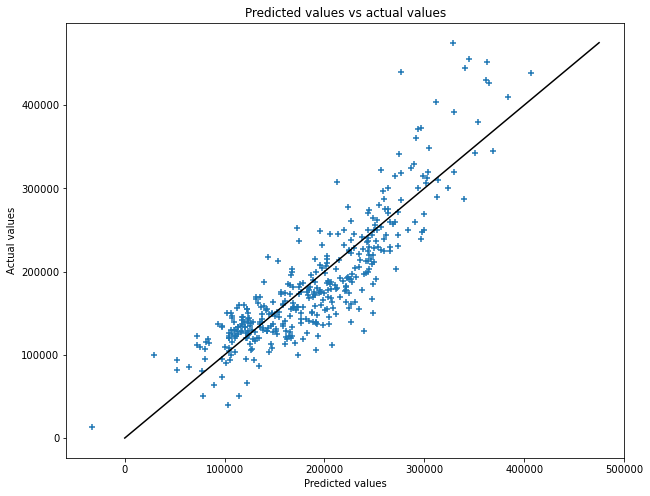

In [38]:
# Plot predicted values vs actual values
plt.figure(figsize=(10,8))
plt.scatter(lr_sm.predict(X_sm_test), y_sm_test, marker = '+')
plt.title('Predicted values vs actual values')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

# Plots x=y line
plt.plot([0,np.max(y_sm_test)],[0,np.max(y_sm_test)], c = 'k');

In [39]:
# R2 score for test set
print(f'The R2 score is: {np.sqrt(metrics.r2_score(y_sm_test, lr_sm.predict(X_sm_test)))}')

The R2 score is: 0.8683785076664156


Even with just two variables, albeit highly-correlated 'overall_qual' and 'gr_liv_area', the above plot demonstrated how a simple linear regression model can perform quite well.  
<br> Even if the R2 score is not used in data science, the R2 score showed how just two variables can provide a good correlation score. 

---

**Linear regression model with 24 variables/features (including 4 polynomic features) from priority list**
<br>

In [40]:
# X_20_train, X_20_test
# y_train, y_test
# instantiate
lr_24 = LinearRegression()

# fit
lr_24.fit(X_20_train, y_train)

LinearRegression()

In [41]:
# metrics
print(f'The rmsme for the training data is: {np.sqrt(metrics.mean_squared_error(y_train, lr_24.predict(X_20_train)))}')
print(f'The rmsme for the validation set is: {np.sqrt(metrics.mean_squared_error(y_test, lr_24.predict(X_20_test)))}')

The rmsme for the training data is: 25110.887233257854
The rmsme for the validation set is: 24294.730159136743


In [42]:
# additional metrics 
print(f'The score for training set is: {lr_24.score(X_20_train, y_train)}')
print(f'The score for validation set is: {lr_24.score(X_20_test, y_test)}')
print(f'The cross val score is: {cross_val_score(lr_24, X_20_train, y_train, cv=5).mean()}')


The score for training set is: 0.9005910441538789
The score for validation set is: 0.8960634933034728
The cross val score is: 0.8886824813083465


From the above scores, the validation and cross val scores are similar. This is good, because this means that there is a representative validation(test) set, with a low probability of a sampling error occuring. 

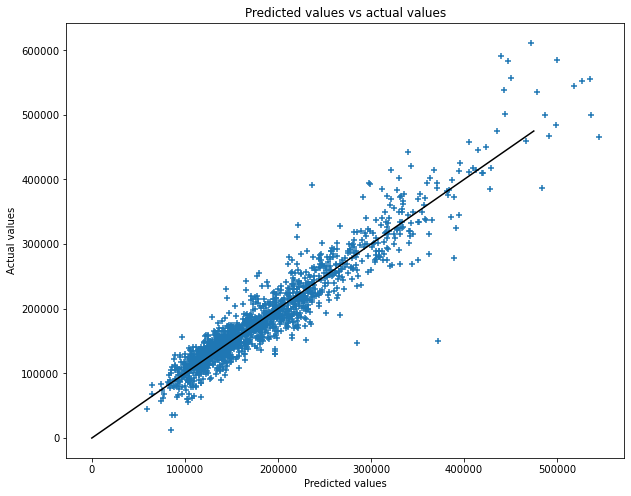

In [43]:
# Plot predicted values vs actual values
plt.figure(figsize=(10,8))
plt.scatter(lr_24.predict(X_20_train), y_train, marker = '+')
plt.title('Predicted values vs actual values')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

# Plots x=y line
plt.plot([0,np.max(y_test)],[0,np.max(y_test)], c = 'k');

In [44]:
# testing on entire training set
print(f'The R2 score is: {np.sqrt(metrics.r2_score(y_test, lr_24.predict(X_20_test)))}')

The R2 score is: 0.9466063032240345


The above plot demonstrates how including more variables would provide better prediction to the target feature 'saleprice'.
<br> Even if the R2 score is not used in data science, the R2 score showed how more variables can provide a better correlation score. 

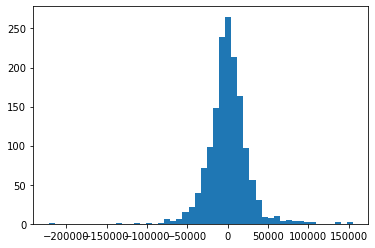

In [45]:
# Plotting residuals
residuals = y_train - lr_24.predict(X_20_train)
plt.hist(residuals, bins=50);

Linear regression requires an assumption of normality of errors. From the plot of these residuals, it did satisfy at least one of the assumptions associated with a linear regression model, even if there are doubts as to whether there is a linear relationship between each variable and the mean of saleprice.

#### Interpretation of coefficients

Now that we have multiple variables, our interpretation are based on **holding all other variables constant**. 


In [46]:
# Taking a peek at the model coefficient and intercept
print(f'The intercept is: {lr_24.intercept_}')

The intercept is: 162814.56049400428


In [47]:
coef_24 = pd.DataFrame(list(zip(X_20_train.columns,lr_24.coef_)))
coef_24.columns = ['variable','coef']

In [48]:
pd.set_option('display.max_rows',None)

coef_24.sort_values(by='coef',ascending=False)

,variable,coef
16,overall_qual*gr_liv_area,72895.136133
17,exter_qual*1st_flr_sf,47607.891645
33,exterior_1st_Stone,42893.302197
18,total_bsmt_sf*kitchen_qual,39867.617513
27,exterior_1st_BrkFace,30261.300547
28,exterior_1st_CBlock,22994.077527
43,foundation_Slab,20864.277582
44,foundation_Stone,14003.583312
34,exterior_1st_Stucco,13190.345373
31,exterior_1st_MetalSd,12207.456386


#### Interpretation of coefficients of numerical variables

For every one unit increase in each $variable$, we expect $saleprice$ to increase/decrease by $coef$, holding all other variables constant.


In [49]:
# reminder of the numerical variables of interest
numerical_20.columns

Index(['overall_qual', 'age', 'exter_qual', 'bsmt_qual', 'total_bsmt_sf',
       'heating_qc', '1st_flr_sf', 'gr_liv_area', 'total_bath', 'kitchen_qual',
       'totrms_abvgrd', 'fireplace_qu', 'garage_age', 'garage_finish',
       'garage_cars', 'overall_qual*overall_qual', 'overall_qual*gr_liv_area',
       'exter_qual*1st_flr_sf', 'total_bsmt_sf*kitchen_qual'],
      dtype='object')

In [50]:
coef_24.loc[coef_24['variable'].isin(numerical_20.columns)].sort_values(by='coef',ascending=False)

,variable,coef
16,overall_qual*gr_liv_area,72895.136133
17,exter_qual*1st_flr_sf,47607.891645
18,total_bsmt_sf*kitchen_qual,39867.617513
8,total_bath,7745.404946
14,garage_cars,4327.715917
3,bsmt_qual,4313.285195
11,fireplace_qu,4276.941082
5,heating_qc,3402.945581
12,garage_age,721.652889
13,garage_finish,525.299442


From the above data, the coefficients for the interaction terms are high. This is not surprising since an analysis was already done to choose the best polynomial features to include in this dataset. 

However, from initial examination and previous linear regression model testing, there is an expectation that the living area above ground (not including basement area) has the largest effect on sale price. This is followed by overall quality of the property and total basement area (living area below ground)(also shown in the plots below). This is because when it comes to real estate, more land is almost always better. This seemed to apply both above and below ground.
<br> 
<br> However, due to these interactive effects, the coefficients for the original variables ('overall_qual', gr_liv_area', 'exter_qual', '1st_flr_sf', 'kitchen_qual' and 'total_bsmt_sf') have changed considerably. This could be due to multicollinearity since the original variables are modeled together with the interaction variables. On the other hand, given the Principle of Marginality, one *should* fit models with both the main effects and their interaction terms.
<br> 
<br> Deciding between 'multicollinearity' and the Principle of Marginality is not part of the scope of Project 2. **The decision here is that the original (main effect) variables will be kept in the model, and their coefficients will not be interpreted in the model.** 


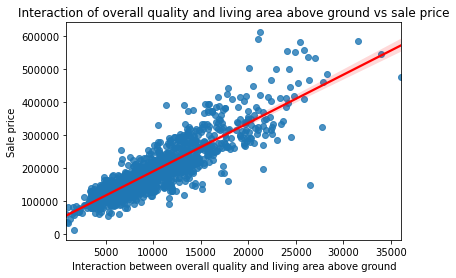

In [51]:
# plot of overall_qual*gr_liv_area vs saleprice
sns.regplot(x=X_train['overall_qual*gr_liv_area'],y=y_train,line_kws={"color": "red"}, ci=95);
plt.title('Interaction of overall quality and living area above ground vs sale price')
plt.xlabel('Interaction between overall quality and living area above ground')
plt.ylabel('Sale price');

<br> Already widely discussed previously (above and during EDA), the overall quality of the property will positively affect the sale price. 
<br>
<br> An improvement of overall quality of the property, together with an additional square feet of size above ground, will lead to an approximate increase of \\$72895 in sale price. 

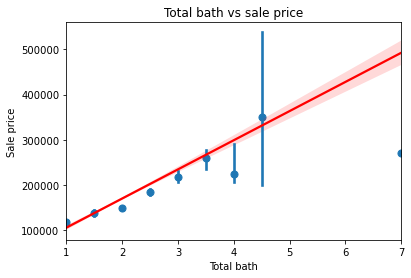

In [52]:
# plot of total bath vs saleprice
sns.regplot(x=X_train['total_bath'],y=y_train,line_kws={"color": "red"}, x_estimator=np.median);
plt.title('Total bath vs sale price')
plt.xlabel('Total bath')
plt.ylabel('Sale price');

At least something was done right during EDA. A combination of all bathrooms in the property will also increase the price of the property. One addition bathroom will increase the sale price by \\$7745. Anything more than 5 bathrooms, though, will not add value to the property. Also, who needs >5 bathrooms? 

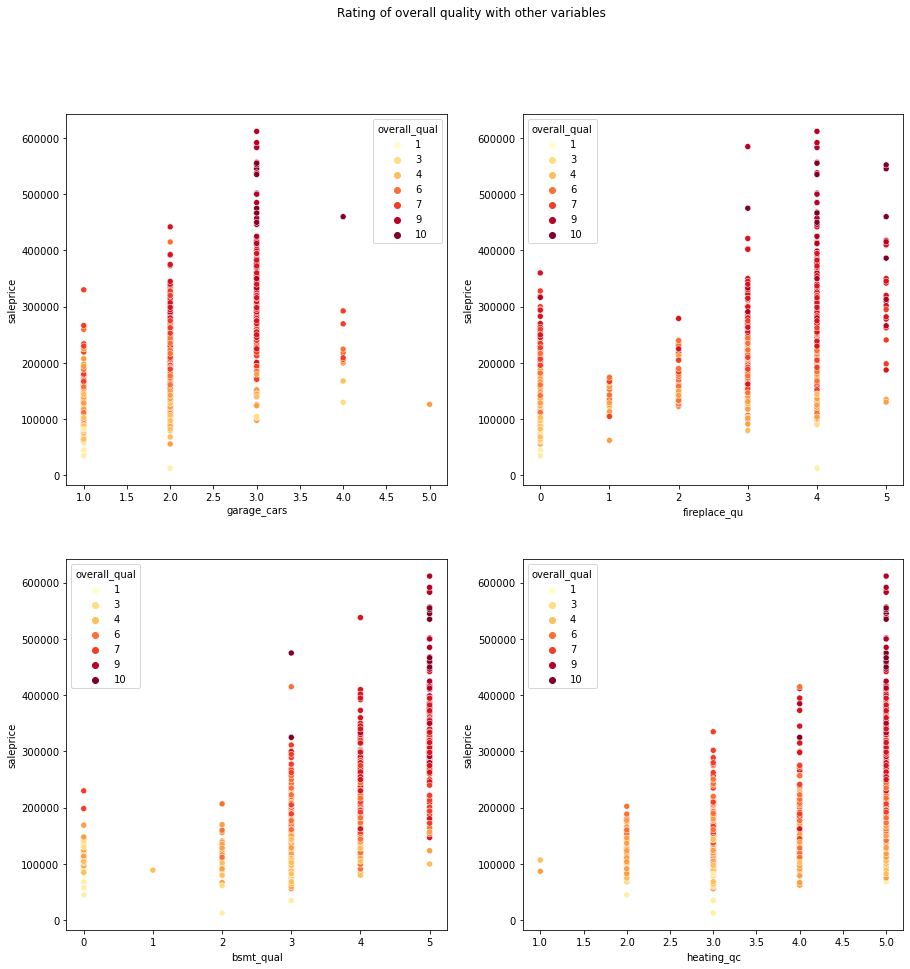

In [53]:
int_columns = X_train[['garage_cars','fireplace_qu','bsmt_qual','heating_qc']]
plot_scatterplot(int_columns)
plt.suptitle('Rating of overall quality with other variables');

Above plots showed that subsequent factors are the general quality of the garage, fireplace, condition of basement and good heating. Again, the better quality the house is in, the higher the sale price. 
> **So, this already demonstrates that simply ensuring that the interior is properly renovated/furnished (which will make it of higher overall quality) will bring a higher sale price.**

On the other hand, 'age' has a negative effect on the sale price (ie., the older the property, the lower the sale price). An increase in age of one year, will decrease the sale price by \\$5540. 
<br>
<br> Yet, the age has a lower (absolute) correlation compared to overall quality. From the plot below, the overall quality of the property still has a larger effect (ie., a newer property, but of poor quality may still fetch the same price as a property which is older, and also of poor quality).

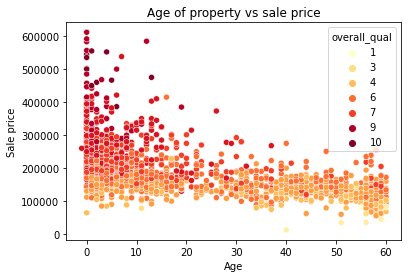

In [54]:
# plots scatterplot
sns.scatterplot(y = y_train, 
            x = X_train['age'], 
            hue=trainlist.overall_qual, 
            palette= 'YlOrRd')

plt.title('Age of property vs sale price')
plt.xlabel('Age')
plt.ylabel('Sale price');

**From the coefficients, four variables, 'garage_age', 'garage_finish' and 'totrms_abvgrd' will be dropped, as they have relatively lower effect on sale price**

#### Interpretation of coefficients of nominal variables

Analysis of coefficients of nominal variables are not that straight-forward; Each interpretation of a dummy variable is **in relation to the baseline (dropped dummy).**
<br>
<br> Also, it is not possible to compare coefficients between numerical and nominal variables, unless one standardises all the columns using their variance (or standard deviation?), shift the mean(?), etc. A scaled coefficient then, can be used to compare all the variables/features together. This is not done here in Project 2.


In [55]:
# reminder of the nomimal variables of interest
nominal_20.columns

Index(['house_style', 'exterior_1st', 'mas_vnr_type', 'foundation',
       'garage_type'],
      dtype='object')

In [56]:
# Reminder of what the intercept is:
print(f'The intercept is: {lr_24.intercept_}')

The intercept is: 162814.56049400428


In [57]:
coef_24.loc[coef_24['variable'].str.contains('foundation')].sort_values(by='coef',ascending=False)

,variable,coef
43,foundation_Slab,20864.277582
44,foundation_Stone,14003.583312
41,foundation_CBlock,11787.480520
45,foundation_Wood,8931.343352
42,foundation_PConc,7372.430465


As mentioned, interpretation of each categorical type in a nominal variable is in relation to the baseline. For example, for nominal variable 'foundation', the above table is in relation to the dropped column 'BrkTil' (ie., foundation made of brick and tile). 
<br> 
<br> Also, each categorical type could only have values [0,1]. If all other categories are zero, and all other variables are constant, the expected increase of saleprice for the baseline ('RrkTil') is \\$162814. A 'foundation' made of 'Slab' will bring \\$20864 more than a property with 'BrkTil' as its foundation. In other words, this extra (\\$20864) if 'BrkTil' was replaced with 'Slab' is the 'effect' on the saleprice. 

In [58]:
coef_24.loc[coef_24['variable'].str.contains('exterior')].sort_values(by='coef',ascending=False)

,variable,coef
33,exterior_1st_Stone,42893.302197
27,exterior_1st_BrkFace,30261.300547
28,exterior_1st_CBlock,22994.077527
34,exterior_1st_Stucco,13190.345373
31,exterior_1st_MetalSd,12207.456386
36,exterior_1st_Wd Sdng,11311.064591
37,exterior_1st_WdShing,10842.596002
30,exterior_1st_HdBoard,10056.493451
32,exterior_1st_Plywood,9895.555417
35,exterior_1st_VinylSd,9583.092465


For exterior_1st, which is the exterior covering of the property, the baseline (or dummy column) is 'AsbShng', which is Asbestos Shingles. From the tables, many other exteriors have a higher correlation compared to 'AsbShng', with the exception of 'ImStucc', which is Imitation Stucco, and 'BrkComm', which is Brick Common. This is because asbestos shingles used to be the gold standard until 1989, when health risks associated with them became widely known. Older properties ('age' variable) would probably have asbestos shingles. And considering their coefficient, asbestos shingles is just as bad as imitation (coef of ImStucc=0). A 'foundation' made of 'stone' will fetch a higher \\$42893 price, compared to 'AbsShng'. 

In [59]:
coef_24.loc[coef_24['variable'].str.contains('house_')].sort_values(by='coef',ascending=False)

,variable,coef
19,house_style_1.5Unf,12069.729533
24,house_style_SFoyer,10658.550027
25,house_style_SLvl,5463.157191
20,house_style_1Story,3610.805530
22,house_style_2.5Unf,-3856.925074
23,house_style_2Story,-3863.162916
21,house_style_2.5Fin,-38836.313588


There is variability in house_style. The baseline is '1.5Fin', which is one and one-half story with 2nd level finished. From the table above, houses with second level, whether it is finished or unfinished, will decrease the sale price, compared to '1.5Fin'. 

---

### Adding variables in wait list

In [60]:
# preview of the data
waitlist.head()

,open_porch_sf,mas_vnr_area,lot_area,bsmtfin_type_1,ms_zoning,lot_config
0,44,289.0,13517,6,RL,CulDSac
1,74,132.0,11492,6,RL,CulDSac
2,52,0.0,7922,6,RL,Inside
3,0,0.0,9802,1,RL,Inside
4,59,0.0,14235,1,RL,Inside


The waitlist consists of 6 additional variables (4 numeric and 2 nominal)

In [61]:
# X also includes the 4 polynomial features
total = pd.concat([X,waitlist], axis=1)
total.head()

,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,totrms_abvgrd,fireplace_qu,garage_age,garage_finish,garage_cars,house_style,exterior_1st,mas_vnr_type,foundation,garage_type,overall_qual*overall_qual,overall_qual*gr_liv_area,exter_qual*1st_flr_sf,total_bsmt_sf*kitchen_qual,open_porch_sf,mas_vnr_area,lot_area,bsmtfin_type_1,ms_zoning,lot_config
0,6,5,4,3,725.0,5,725,1479,2.5,4,6,0,34.0,2,2.0,2Story,HdBoard,BrkFace,CBlock,Attchd,36,8874,2900,2900.0,44,289.0,13517,6,RL,CulDSac
1,7,12,4,4,913.0,5,913,2122,3.5,4,8,3,12.0,2,2.0,2Story,VinylSd,BrkFace,PConc,Attchd,49,14854,3652,3652.0,74,132.0,11492,6,RL,CulDSac
2,5,3,3,3,1057.0,3,1057,1057,2.0,4,5,0,57.0,1,1.0,1Story,VinylSd,None,CBlock,Detchd,25,5285,3171,4228.0,52,0.0,7922,6,RL,Inside
3,5,3,3,4,384.0,4,744,1444,2.5,3,7,0,3.0,3,2.0,2Story,VinylSd,None,PConc,BuiltIn,25,7220,2232,1152.0,0,0.0,9802,1,RL,Inside
4,6,17,3,2,676.0,3,831,1445,2.0,3,6,0,53.0,1,2.0,1.5Fin,Wd Sdng,None,PConc,Detchd,36,8670,2493,2028.0,59,0.0,14235,1,RL,Inside


In [62]:
# checking there are 30 variables (including 4 polynomial features)
total.shape

(1912, 30)

In [63]:
# 'garage_age','garage_finish','totrms_abvgrd' are dropped from previous linear regression test
X_total = total.drop(columns=['garage_age','garage_finish','totrms_abvgrd'])
y_total = y

#### Splitting the data

In [64]:
X_tot_train, X_tot_test, y_tot_train, y_tot_test = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

Repeat same process as done on priority list

### Dealing with training data (X_tot_train, y_tot_train)

###### One-hot encoding the nominal variables


In [65]:
# select columns with nominal variables
nominal_27 = X_tot_train.select_dtypes(include=['object']).copy()

# examining the number of types in each nominal variables
for col in nominal_27.columns:
    print(col, ':', len(nominal_27[col].unique()))

house_style : 8
exterior_1st : 13
mas_vnr_type : 4
foundation : 6
garage_type : 6
ms_zoning : 7
lot_config : 5


In [66]:
dummy_27 = pd.get_dummies(data=nominal_27, columns=nominal_27.columns, drop_first=True)

dummy_27.reset_index(inplace=True)

##### Scaling the numerical data

In [67]:
# once again, select columns with numerical variables
numerical_27 = X_tot_train.select_dtypes(include=['int64','float64']).copy() 

# 12+4+4 numerical variables
numerical_27.head()

,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,fireplace_qu,garage_cars,overall_qual*overall_qual,overall_qual*gr_liv_area,exter_qual*1st_flr_sf,total_bsmt_sf*kitchen_qual,open_porch_sf,mas_vnr_area,lot_area,bsmtfin_type_1
1378,6,10,3,4,1838.0,5,1838,1838,4.0,3,0,3.0,36,11028,5514,5514.0,67,0.0,10126,6
1662,5,14,3,4,1392.0,3,1392,1392,2.5,3,4,2.0,25,6960,4176,4176.0,0,180.0,11341,5
1786,5,57,3,2,910.0,3,910,1435,2.0,3,0,1.0,25,7175,2730,2730.0,33,0.0,8674,3
339,5,9,3,3,793.0,5,848,1520,1.0,3,0,1.0,25,7600,2544,2379.0,0,0.0,4500,3
1395,5,10,3,4,520.0,5,1464,1464,2.5,3,3,2.0,25,7320,4392,1560.0,0,0.0,12886,5


In [68]:
# Scale the data.
sc_27 = StandardScaler()

X_scaled_27 = pd.DataFrame(sc_27.fit_transform(numerical_27))
X_scaled_27.columns = numerical_27.columns
X_scaled_27.reset_index(inplace=True)

##### Recombine both nominal and numerical dataframe

In [69]:
# concating both dataframes
X_27_train = pd.concat([X_scaled_27,dummy_27], axis=1)
X_27_train.drop(columns=['index'],inplace=True)
X_27_train.head()

,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,fireplace_qu,garage_cars,overall_qual*overall_qual,overall_qual*gr_liv_area,exter_qual*1st_flr_sf,total_bsmt_sf*kitchen_qual,open_porch_sf,mas_vnr_area,lot_area,bsmtfin_type_1,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,...,exterior_1st_Wd Sdng,exterior_1st_WdShing,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside
0,-0.117931,-0.627384,-0.730998,0.556992,1.816197,0.855464,1.791433,0.693628,2.223176,-0.831422,-1.022790,1.723948,-0.221628,0.287923,0.783456,0.788447,0.298449,-0.592387,0.006617,1.108673,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,-0.839196,-0.434943,-0.730998,0.556992,0.765449,-1.245748,0.593291,-0.235023,0.326634,-0.831422,1.191505,0.198533,-0.844966,-0.567193,0.042722,0.133888,-0.726287,0.438630,0.207892,0.632102,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,-0.839196,1.633796,-0.730998,-1.708010,-0.370113,-1.245748,-0.701563,-0.145490,-0.305547,-0.831422,-1.022790,-1.326882,-0.844966,-0.521999,-0.757802,-0.573506,-0.221566,-0.592387,-0.233919,-0.321038,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,-0.839196,-0.675494,-0.730998,-0.575509,-0.645758,0.855464,-0.868121,0.031495,-1.569908,-0.831422,-1.022790,-1.326882,-0.844966,-0.432662,-0.860774,-0.745218,-0.726287,-0.592387,-0.925377,-0.321038,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,-0.839196,-0.627384,-0.730998,0.556992,-1.288929,0.855464,0.786713,-0.085106,0.326634,-0.831422,0.637931,0.198533,-0.844966,-0.491519,0.162303,-1.145879,-0.726287,-0.592387,0.463835,0.632102,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [70]:
X_27_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   overall_qual                1529 non-null   float64
 1   age                         1529 non-null   float64
 2   exter_qual                  1529 non-null   float64
 3   bsmt_qual                   1529 non-null   float64
 4   total_bsmt_sf               1529 non-null   float64
 5   heating_qc                  1529 non-null   float64
 6   1st_flr_sf                  1529 non-null   float64
 7   gr_liv_area                 1529 non-null   float64
 8   total_bath                  1529 non-null   float64
 9   kitchen_qual                1529 non-null   float64
 10  fireplace_qu                1529 non-null   float64
 11  garage_cars                 1529 non-null   float64
 12  overall_qual*overall_qual   1529 non-null   float64
 13  overall_qual*gr_liv_area    1529 

### Dealing with validation set (X_tot_test, y_tot_test)

#### One-hot encoding the nominal variables

In [71]:
# select columns with nominal variables
nominal_27t = X_tot_test.select_dtypes(include=['object']).copy()

In [72]:
dummy_27t = pd.get_dummies(data=nominal_27t, columns=nominal_27t.columns, drop_first=True)
pd.set_option('display.max_columns',50)
dummy_27t.reset_index(inplace=True)

#### Checking for same number of columns in both dummy (train and test) sets


In [73]:
# Get missing columns in the training test
missing_cols = set(dummy_27.columns) - set(dummy_27t.columns)

# Add a missing column in test set with 0
for col in missing_cols:
    dummy_27t[col] = 0
    
# Ensure the order of column in the test set is in the same order in train set
dummy_27t = dummy_27t[dummy_27.columns]


##### Scaling the numerical data

In [74]:
# once again, select columns with numerical variables
numerical_27t = X_tot_test.select_dtypes(include=['int64','float64']).copy() 

# 15+4 numerical variables
numerical_27t.head()

,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,fireplace_qu,garage_cars,overall_qual*overall_qual,overall_qual*gr_liv_area,exter_qual*1st_flr_sf,total_bsmt_sf*kitchen_qual,open_porch_sf,mas_vnr_area,lot_area,bsmtfin_type_1
1229,6,12,3,4,773.0,4,773,1658,3.5,3,3,2.0,36,9948,2319,2319.0,84,0.0,8000,6
111,5,46,3,3,988.0,3,988,988,2.0,3,0,2.0,25,4940,2964,2964.0,0,57.0,9945,3
1845,7,16,3,4,728.0,3,1136,2019,1.0,4,0,2.0,49,14133,3408,2912.0,135,0.0,11414,1
1326,5,57,3,2,876.0,3,876,876,1.0,3,3,2.0,25,4380,2628,2628.0,0,0.0,7200,2
415,6,39,3,3,1442.0,3,1442,1442,2.0,3,3,2.0,36,8652,4326,4326.0,0,571.0,11717,1


In [75]:
# transforming only test data using sc_27
X_scaled_27t = pd.DataFrame(sc_27.transform(numerical_27t))
X_scaled_27t.columns = numerical_27t.columns
X_scaled_27t.reset_index(inplace=True)

##### Recombine both nominal and numerical dataframe

In [76]:
# concating both dataframes
X_27_test = pd.concat([X_scaled_27t,dummy_27t], axis=1)
X_27_test.drop(columns=['index'],inplace=True)
X_27_test.head()

,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,fireplace_qu,garage_cars,overall_qual*overall_qual,overall_qual*gr_liv_area,exter_qual*1st_flr_sf,total_bsmt_sf*kitchen_qual,open_porch_sf,mas_vnr_area,lot_area,bsmtfin_type_1,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,...,exterior_1st_Wd Sdng,exterior_1st_WdShing,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside
0,-0.117931,-0.531163,-0.730998,0.556992,-0.692877,-0.195142,-1.069602,0.318836,1.590995,-0.831422,0.637931,0.198533,-0.221628,0.060901,-0.985336,-0.774571,0.558457,-0.592387,-0.345573,1.108673,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,-0.839196,1.104584,-0.730998,-0.575509,-0.186350,-1.245748,-0.492022,-1.076222,-0.305547,-0.831422,-1.022790,0.198533,-0.844966,-0.991809,-0.628256,-0.459032,-0.726287,-0.265898,-0.023367,-0.321038,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0.603334,-0.338722,-0.730998,0.556992,-0.798894,-1.245748,-0.094432,1.070501,-1.569908,0.698355,-1.022790,0.198533,0.515044,0.940611,-0.382452,-0.484471,1.338481,-0.592387,0.219985,-1.274179,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,-0.839196,1.633796,-0.730998,-1.708010,-0.450215,-1.245748,-0.792901,-1.309426,-1.569908,-0.831422,0.637931,0.198533,-0.844966,-1.109524,-0.814270,-0.623405,-0.726287,-0.592387,-0.478099,-0.797608,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,-0.117931,0.767813,-0.730998,-0.575509,0.883246,-1.245748,0.727612,-0.130914,-0.305547,-0.831422,0.637931,0.198533,-0.221628,-0.211526,0.125764,0.207269,-0.726287,2.678227,0.270180,-1.274179,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [77]:
X_27_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   overall_qual                383 non-null    float64
 1   age                         383 non-null    float64
 2   exter_qual                  383 non-null    float64
 3   bsmt_qual                   383 non-null    float64
 4   total_bsmt_sf               383 non-null    float64
 5   heating_qc                  383 non-null    float64
 6   1st_flr_sf                  383 non-null    float64
 7   gr_liv_area                 383 non-null    float64
 8   total_bath                  383 non-null    float64
 9   kitchen_qual                383 non-null    float64
 10  fireplace_qu                383 non-null    float64
 11  garage_cars                 383 non-null    float64
 12  overall_qual*overall_qual   383 non-null    float64
 13  overall_qual*gr_liv_area    383 non

---

**Linear regression model with 27 variables/features from priority and wait list**

In [78]:
# X_27_train, X_27_test, y_tot_train, y_tot_test
# instantiate
lr_tot = LinearRegression()

# fit
lr_tot.fit(X_27_train, y_tot_train)

LinearRegression()

In [79]:
# metrics
print(f'The rsme for the training data is: {np.sqrt(metrics.mean_squared_error(y_tot_train, lr_tot.predict(X_27_train)))}')
print(f'The rsme for the validation set is: {np.sqrt(metrics.mean_squared_error(y_tot_test, lr_tot.predict(X_27_test)))}')


The rsme for the training data is: 23327.26155481869
The rsme for the validation set is: 23859.112854341976


#### Interpretation of coefficients

In [80]:
# Taking a peek at the model coefficient and intercept
print(f'The intercept is: {lr_tot.intercept_}')

The intercept is: 188184.75577344472


In [81]:
coef_tot = pd.DataFrame(list(zip(X_27_train.columns,lr_tot.coef_)))
coef_tot.columns = ['variable','coef']
coef_tot.sort_values(by='coef',ascending=False)

,variable,coef
13,overall_qual*gr_liv_area,64128.563343
14,exter_qual*1st_flr_sf,56336.405866
34,exterior_1st_Stone,35241.623987
15,total_bsmt_sf*kitchen_qual,35058.581132
28,exterior_1st_BrkFace,30301.767265
45,foundation_Stone,20380.761169
44,foundation_Slab,19800.659105
41,mas_vnr_type_Stone,14096.984048
20,house_style_1.5Unf,13713.706144
35,exterior_1st_Stucco,12996.538718


#### Interpretation of coefficients of numerical variables


In [82]:
coef_tot.loc[coef_tot['variable'].isin(numerical_27.columns)].sort_values(by='coef',ascending=False)

,variable,coef
13,overall_qual*gr_liv_area,64128.563343
14,exter_qual*1st_flr_sf,56336.405866
15,total_bsmt_sf*kitchen_qual,35058.581132
18,lot_area,8059.870923
19,bsmtfin_type_1,5356.105234
8,total_bath,4383.464034
11,garage_cars,3438.049425
10,fireplace_qu,3428.652251
3,bsmt_qual,3292.464007
5,heating_qc,2785.455078


The additional variables 'lot_area', 'bsmtfin_type_1' now bring an additional \\$8059 and \\$5356 to sale price for every unit increase in each variable. However,  'open_porch_sf' has little effect on sale price.


**From the above coefficients, 'open_porch_sf' will be dropped, since they have little effect on sale price. Please note that main effects, which are part of interaction terms will not be dropped.**

#### Interpretation of coefficients of nominal variables


As mentioned previously, analysis of coefficients of nominal variables are not that straight-forward; Each interpretation of a dummy variable is in relation to the baseline (dropped dummy).
<br>

In [83]:
# Reminder of the intercept
print(f'The intercept is: {lr_tot.intercept_}')

The intercept is: 188184.75577344472


In [84]:
coef_tot.loc[coef_tot['variable'].str.contains('ms_zoning')].sort_values(by='coef',ascending=False)

,variable,coef
53,ms_zoning_FV,-16901.583183
56,ms_zoning_RL,-23593.623304
57,ms_zoning_RM,-30406.617303
55,ms_zoning_RH,-33475.293024
52,ms_zoning_C (all),-44427.404256
54,ms_zoning_I (all),-56263.447753


For added nominal variable 'ms_zoning', which is the general zone at which the property lies. The above table is in relation to the dropped column 'A' (ie., Agriculture zone). 
<br> 
<br> If all other categories are zero, and all other variables are constant, the expected increase of saleprice for the baseline ('A') is \\$188184. A 'ms_zoning' at 'I' (Industrial zone) will lower the price by \\$56263 compared to property in 'A'. 

In [85]:
coef_tot.loc[coef_tot['variable'].str.contains('lot_config')].sort_values(by='coef',ascending=False)

,variable,coef
58,lot_config_CulDSac,3838.819253
61,lot_config_Inside,338.639162
60,lot_config_FR3,-8873.204278
59,lot_config_FR2,-9084.090946


While lot_area has an effect on sale price, configuration of the lot tells a different story. Here, the baseline is 'Corner'. If all other categories are zero, and other variables/features are constant, the expected effect of sale price due to a 'Corner' lot is \\$188184. However, a 'CulDSac' (Cul-de-sac) lot would increase the sale price by \\$3838, relative to if a corner lot was configured. 

**Therefore, these are the final 26 (including 4 polynomic) variables, that will be used for kaggle submission:**
* overall_qual
* age
* exter_qual
* bsmt_qual
* total_bsmt_sf
* heating_qc
* 1st_flr_sf
* gr_liv_area
* total_bath
* kitchen_qual
* fireplace_qu
* garage_cars
* mas_vnr_area
* lot_area
* bsmtfin_type_1
* overall_qual*gr_liv_area
* exter_qual*1st_flr_sf 
* overall_qual*overall_qual
* total_bsmt_sf*kitchen_qual
* house_style
* exterior_1st
* mas_vnr_type
* foundation
* garage_type
* ms_zoning
* lot_config

**Save data as csv file for kaggle submission notebook.**

In [86]:
# combine for export
X_final= pd.concat([X_total,y_total], axis=1)

# columns dropped from examining model lr_total
X_final.drop(columns=['open_porch_sf'],inplace=True)
X_final.head()

,overall_qual,age,exter_qual,bsmt_qual,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,total_bath,kitchen_qual,fireplace_qu,garage_cars,house_style,exterior_1st,mas_vnr_type,foundation,garage_type,overall_qual*overall_qual,overall_qual*gr_liv_area,exter_qual*1st_flr_sf,total_bsmt_sf*kitchen_qual,mas_vnr_area,lot_area,bsmtfin_type_1,ms_zoning,lot_config,saleprice
0,6,5,4,3,725.0,5,725,1479,2.5,4,0,2.0,2Story,HdBoard,BrkFace,CBlock,Attchd,36,8874,2900,2900.0,289.0,13517,6,RL,CulDSac,130500
1,7,12,4,4,913.0,5,913,2122,3.5,4,3,2.0,2Story,VinylSd,BrkFace,PConc,Attchd,49,14854,3652,3652.0,132.0,11492,6,RL,CulDSac,220000
2,5,3,3,3,1057.0,3,1057,1057,2.0,4,0,1.0,1Story,VinylSd,None,CBlock,Detchd,25,5285,3171,4228.0,0.0,7922,6,RL,Inside,109000
3,5,3,3,4,384.0,4,744,1444,2.5,3,0,2.0,2Story,VinylSd,None,PConc,BuiltIn,25,7220,2232,1152.0,0.0,9802,1,RL,Inside,174000
4,6,17,3,2,676.0,3,831,1445,2.0,3,0,2.0,1.5Fin,Wd Sdng,None,PConc,Detchd,36,8670,2493,2028.0,0.0,14235,1,RL,Inside,138500


In [87]:
# export to kaggle notebook
X_final.to_csv('../datasets/data_priority_wait_set.csv',index=False)

### Summary of linear regression


| model | description |nr features (+ poly)  | train RSME  | validn RSME  | 
|---|----------|---------|-------|-----------|
|lr_sm| simplest | 2 (+0) | 40074.50 | 37370.07
|lr| priority list | 20 (+4) | 25086.17 | 24445.18|
|  | |                  -3 variables dropped-| -waitlist added-             |
|lr_total| priority + waitlist | 23 (+4) | 23327.26| 23918.05| 
|  | |                  -1 variable dropped-|           |

---

### Ridge/ lasso regression 

**For simplicity, the same 27 variables used for linear regression, would also be used for Ridge/Lasso regression**

Reminder again of the following: X_27_train, X_27_test, y_tot_train, y_tot_test

### Ridge regression

##### Ridge regression (with 2 variables)

In [88]:
# let's take a look at how lasso will compare with the simplest linear regression model
# use same variables as lr_sm
X_sm_train = X_20_train[['overall_qual','gr_liv_area']]
y_sm_train = y_train

X_sm_test = X_20_test[['overall_qual','gr_liv_area']]
y_sm_test = y_test

In [89]:
# Instantiate.
r_alphas = np.logspace(-10, 5, 150)

# Cross-validate over list of ridge alphas.
ridge_sm_cv = RidgeCV(alphas=r_alphas, cv=5, scoring='neg_mean_squared_error')

# Fit model using alpha!
ridge_sm_cv.fit(X_sm_train, y_sm_train)

RidgeCV(alphas=array([1.00000000e-10, 1.26087241e-10, 1.58979923e-10, 2.00453398e-10,
       2.52746159e-10, 3.18680658e-10, 4.01815648e-10, 5.06638264e-10,
       6.38806207e-10, 8.05453121e-10, 1.01557362e-09, 1.28050875e-09,
       1.61455815e-09, 2.03575182e-09, 2.56682330e-09, 3.23643668e-09,
       4.08073370e-09, 5.14528453e-09, 6.48754729e-09, 8.17996938e-09,
       1.03138977e-08, 1.30045090e-0...
       7.68964057e+02, 9.69565562e+02, 1.22249846e+03, 1.54141458e+03,
       1.94352711e+03, 2.45053971e+03, 3.08981791e+03, 3.89586614e+03,
       4.91219013e+03, 6.19364499e+03, 7.80939607e+03, 9.84665203e+03,
       1.24153719e+04, 1.56541998e+04, 1.97379486e+04, 2.48870348e+04,
       3.13793754e+04, 3.95653887e+04, 4.98869069e+04, 6.29010244e+04,
       7.93101660e+04, 1.00000000e+05]),
        cv=5, scoring='neg_mean_squared_error')

In [90]:
# Here is the optimal value of alpha
ridge_sm_cv.alpha_

2.949841340341698

In [91]:
# Instantiate.
ridge_sm_model = Ridge(alpha=ridge_sm_cv.alpha_)

# Fit model using best ridge alpha!
ridge_sm_model.fit(X_sm_train, y_sm_train)

# Evaluate model using rsme.
print(f'The rsme for the training data is: {np.sqrt(mean_squared_error(y_sm_train, ridge_sm_model.predict(X_sm_train)))}')
print(f'The rsme for the validation data is: {np.sqrt(mean_squared_error(y_sm_test, ridge_sm_model.predict(X_sm_test)))}')

The rsme for the training data is: 40074.591752621716
The rsme for the validation data is: 37365.41957083274


##### Ridge regression (with 27 variables)

In [ ]:
# X_27_train, X_27_test, y_tot_train, y_tot_test
# Instantiate.
r_alphas = np.logspace(0, 5, 150)

# Cross-validate over list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, cv=5, scoring='neg_mean_squared_error')

# Fit model using alpha!
ridge_cv.fit(X_27_train, y_tot_train)

In [ ]:
# Here is the optimal value of alpha
ridge_cv.alpha_

The optimised alpha in the ridge model is close to the default value of 1.0. So the optimised value will be used.

In [ ]:
# Instantiate.
ridge_model = Ridge(alpha=ridge_cv.alpha_)

# Fit model using best ridge alpha!
ridge_model.fit(X_27_train, y_tot_train)

# Evaluate model using rsme.
print(f'The rsme for the training data is: {np.sqrt(mean_squared_error(y_tot_train, ridge_model.predict(X_27_train)))}')
print(f'The rsme for the validation data is: {np.sqrt(mean_squared_error(y_tot_test, ridge_model.predict(X_27_test)))}')

### Lasso regression

##### Lasso regression (with 2 variables)

In [ ]:
# let's take a look at how lasso will compare with the simplest linear regression model
# use same variables as lr_sm
X_sm_train = X_20_train[['overall_qual','gr_liv_area']]
y_sm_train = y_train

X_sm_test = X_20_test[['overall_qual','gr_liv_area']]
y_sm_test = y_test

In [ ]:
# Cross-validate over the list of Lasso alphas.
lasso_sm_cv = LassoCV(n_alphas=1000, cv=5, max_iter=5000)

# Fit model using best ridge alpha!
lasso_sm_cv.fit(X_sm_train, y_sm_train)

In [ ]:
# Here is the optimal value of alpha
lasso_sm_cv.alpha_

In [ ]:
# Instantiate.
lasso_sm_model = Lasso(alpha=lasso_sm_cv.alpha_)

# Fit model using best ridge alpha!
lasso_sm_model.fit(X_sm_train, y_sm_train)

# Evaluate model using rsme.
print(f'The rsme for the training data is: {np.sqrt(mean_squared_error(y_sm_train, lasso_sm_model.predict(X_sm_train)))}')
print(f'The rsme for the validation data is: {np.sqrt(mean_squared_error(y_sm_test, lasso_sm_model.predict(X_sm_test)))}')

##### Lasso regression (with 27 variables)

In [ ]:
# X_27_train, X_27_test, y_tot_train, y_tot_test
# Cross-validate over a list of Lasso alphas.
lasso_cv = LassoCV(n_alphas=1000, cv=5, max_iter=1000)

# Fit model using best ridge alpha!
lasso_cv.fit(X_27_train, y_tot_train)

In [ ]:
# Here is the optimal value of alpha
lasso_cv.alpha_

In [ ]:
# Instantiate.
lasso_model = Lasso(alpha=lasso_cv.alpha_)

# Fit model using best ridge alpha!
lasso_model.fit(X_27_train, y_tot_train)

lasso_coef=lasso_model.coef_

In [ ]:
# Evaluate model using rsme.
print(f'The rsme for the training data is: {np.sqrt(mean_squared_error(y_tot_train, lasso_model.predict(X_27_train)))}')
print(f'The rsme for the validation data is: {np.sqrt(mean_squared_error(y_tot_test, lasso_model.predict(X_27_test)))}')

In [ ]:
lasso_coef

When alpha in the lasso_model is large, the coefficients are close to zero.
<br> Let's try using default value alpha=1.0

In [ ]:
# Instantiate.
lasso_model_a1 = Lasso(alpha=1.0)

# Fit model using best ridge alpha!
lasso_model_a1.fit(X_27_train, y_tot_train)

lasso_coef_a1=lasso_model.coef_

In [ ]:
# Evaluate model using rsme.
print(f'The rsme for the training data is: {np.sqrt(mean_squared_error(y_tot_train, lasso_model_a1.predict(X_27_train)))}')
print(f'The rsme for the validation data is: {np.sqrt(mean_squared_error(y_tot_test, lasso_model_a1.predict(X_27_test)))}')

In [ ]:
lasso_coef_a1

Both rsme when alpha=1.0 and alpha=1.885 are utilised, are almost similar in this lasso model. 

### Summary of models 

The model of choice is dependent on the number of variables. With only two variables, linear regression model would be selected, since it is simple to use and there is little/no difference in the rsme of each model.
<br> 
<br> The story is different when more features are added. Obviously, one would still need to select predictive features that are highly correlated with the target feature. As my professors used to repeatly say 'rubbish in, rubbish out'. In this scenario (assuming intuition/guessing was not used to select features), either the ridge or lasso model would be utilised. Ridge/lasso regression is ordinary least squares regression with a penalty term. When features suffer from multicollinearity, adding a degree of bias reduces the standard errors. This is solved with the use of the alpha hyperparameter in the penalty term.  


| model | description |hyperparams| nr features | train RSME  | validn RSME  |
|-----|-----------------------------------------------|--------------|-------|-----------|-----------|
|lr_sm| simplest | - | 2  | 40074.50 | 37370.07|
|lr| priority list | - | 24 | 25086.17 | 24445.18| 
|lr_tot|      priority + waitlist         | - | 27 | 23327.26| 23918.05|
|ridge_sm| simple | alpha=2.950 | 2 |  40074.59 | 37365.42 |
|ridge| opt alpha | alpha=1.855| 27 | 23393.61 | 23300.30 | 
|lasso_sm| simple | alpha=63.338|  2 | 40074.56 | 37364.39 | 
|lasso| opt alpha | alpha=69.672 |  27 | 23594.57 | 23358.20 | 
|lasso_a1| default alpha |alpha=1.0|  27 | 23329.54 | 23672.80 | 

## Conclusions and Recommendations

**Main factors:** 
The overall quality of the property is a huge factor in determining its value. Overall quality is the rating of the overall finish, material, etc of the house. This is also evident in other factors, since condition of the material on the exterior, kitchen, fireplace, basement, heating are also related to the general overall quality of the house.

As expected, size matters! Larger living areas, area of first floor, lot area, masonry veneer area, number of baths are also huge factors in the sale price. An extra bathroom (up to 4 in total) can increase value to the property.

On the other hand, the age of the property has a negative impact on sale price. However, this can be curtailed by having remodeling or renovations done.

**Renovations:**
- **What renovations then will add the most value to a house?**
- An extension to the property (increase in square footage), especially when one adds to the living areas, rather than add an extra bedroom, will increase the value. Number of bedrooms seemed to have little impact. It could be that expanding a bedroom might reduce living areas. 

- Renovations to just one part of the house like upgrading the kitchen or bathroom, will fetch a higher sale price. One can also make it more efficient - by installing smart-home technology can help increase its value.
<br> 

- **What improvements will NOT add value to a house?**
- The size of a porch has little effect. Either not everyone likes to sit on the porch, or it cannot be used all year. While a porch can be used in good weather, one can stay indoors all day.
- Having a swimming pool or pool area haa no effect. This is not surprising since it is expensive and a hassle to maintain.




**Further improvements to model:**
* Using statistical tools (ANOVA, Chi-square) or the coefficient of unalikeability to better determine the nominal variables would be beneficial, rather than relying on how dominant a category is in each variable.
* In a previous lasso model with different set of features, the optimised alpha was approximately 1500, and the coefficients were/close to zero. When the default value alpha=1.0 was used, the rsme was better. This shows the importance of properly selecting the features used in the model.
* Previous inclusion of nominal variables such as 'neighborhood' and 'ms_subclass', which identifies the neighbourhood and dwelling the property was in, showed improvements to the rsme. However, due to the lack of location desirability variable and limited observations in some of the categories, one does not know how to rank/analyse them properly. 
* On hindsight, type of garage should be removed. Due to uncertainty if a negative correlation (relative to the baseline) would literally imply a lower effect on sale price, the decision was to leave it in, and re-examining it at another time. That 'other time' did not materialise.
